>

# **Group Members:**
**CS-20072 AIRA FARMAN**


**CS-20036 AREESHA RAZA JAGIRANI**

***Step 1: PREPROCESSING AND FEATURE ENGINEERING***

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#Importing and reading dataset
dataset = pd.read_csv("weatherHistory.csv")
dataset.shape

(96453, 12)

In [ ]:
#familiarisation with the nature of the dataset
dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
#checking if the dataset is imbalanced
summary_Weather = dataset["Summary"].value_counts().reset_index()
summary_Weather.columns = ["Weather Type", "count"]
summary_Weather

,Weather Type,count
0,Partly Cloudy,31733
1,Mostly Cloudy,28094
2,Overcast,16597
3,Clear,10890
4,Foggy,7148
5,Breezy and Overcast,528
6,Breezy and Mostly Cloudy,516
7,Breezy and Partly Cloudy,386
8,Dry and Partly Cloudy,86
9,Windy and Partly Cloudy,67


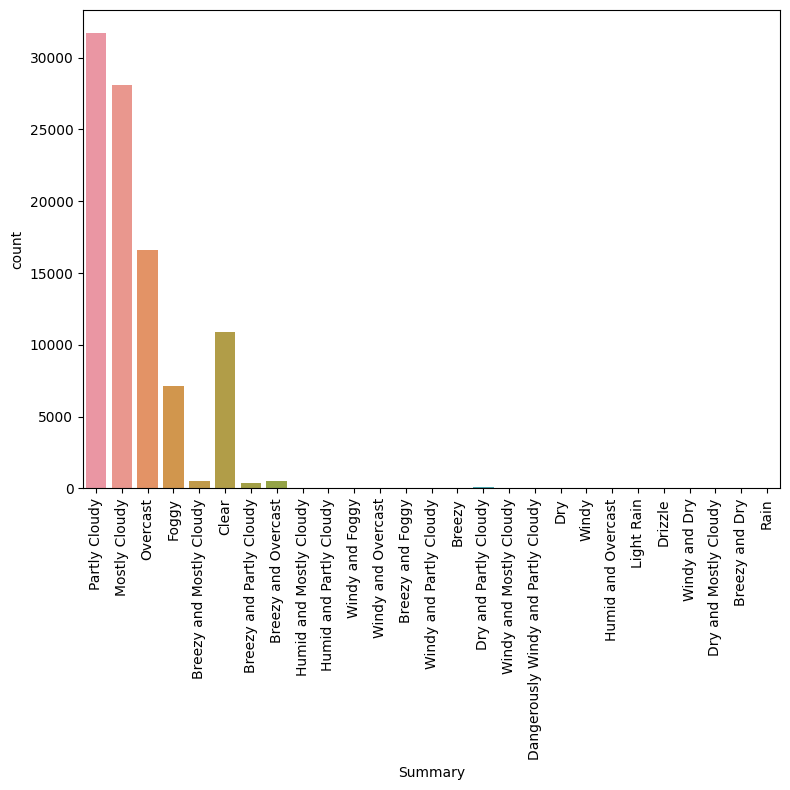

In [ ]:
#since our dataset is highly imbalanced, this makes our dataset biased towards certain classes, now checking it graphically
plt.figure(figsize=(8,8))
sns.countplot(x='Summary', data=dataset)
plt.xticks(rotation=90)
# Rotate the x-axis labels by 90 degrees
plt.tight_layout()
# Adjust the layout to prevent overlapping labels
plt.show()

In [6]:
#Now checking for any missing values in our dataset
w_missing = dataset.isna().sum()
w_missing

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
#filling the missing values with most frequent value in Precip Type Feature
dataset["Precip Type"].fillna(dataset["Precip Type"].value_counts().index[0],inplace=True)
dataset.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [8]:
# Delete the loud cover column since most of its enteries are zero
del dataset['Loud Cover']
dataset.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [11]:
#Feature Importance with Random Forest
from sklearn.ensemble import RandomForestClassifier
X = dataset.drop(['Summary'], axis=1)
y = dataset['Summary']
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
top_k = 5
X_rf = X.iloc[:, indices[:top_k]]
print("\nFeature Importance with Random Forest:")
print(X_rf)

ValueError: ignored

In [10]:
# Delete the formatted date and daily summary column as we don't need it

del dataset['Formatted Date']
del dataset['Daily Summary']
dataset.head(10)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
5,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66
6,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72
7,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,1016.84
8,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37
9,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22


In [12]:
# dropping windbearing column
dataset.drop('Wind Bearing (degrees)', axis=1, inplace=True)

<Axes: xlabel='Summary', ylabel='Temperature (C)'>

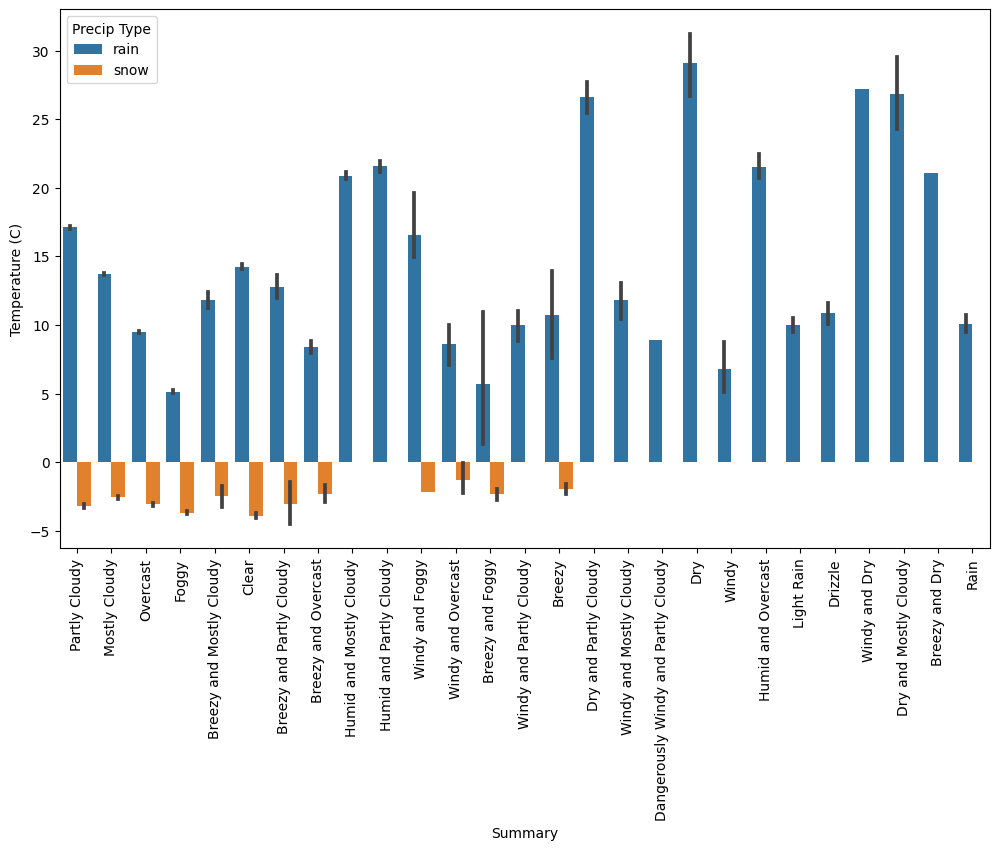

In [ ]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(data=dataset, x="Summary", y="Temperature (C)",hue="Precip Type")

In [13]:
# Dropping the precip type column

dataset.drop('Precip Type', axis=1, inplace=True)
dataset.head(5)

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,Partly Cloudy,9.472222,7.388889,0.89,14.1197,15.8263,1015.13
1,Partly Cloudy,9.355556,7.227778,0.86,14.2646,15.8263,1015.63
2,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,14.9569,1015.94
3,Partly Cloudy,8.288889,5.944444,0.83,14.1036,15.8263,1016.41
4,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,15.8263,1016.51


C:\Users\Areesha\AppData\Local\Temp\ipykernel_5492\2516486705.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr()


Text(0.5, 1.0, 'correlations heat map')

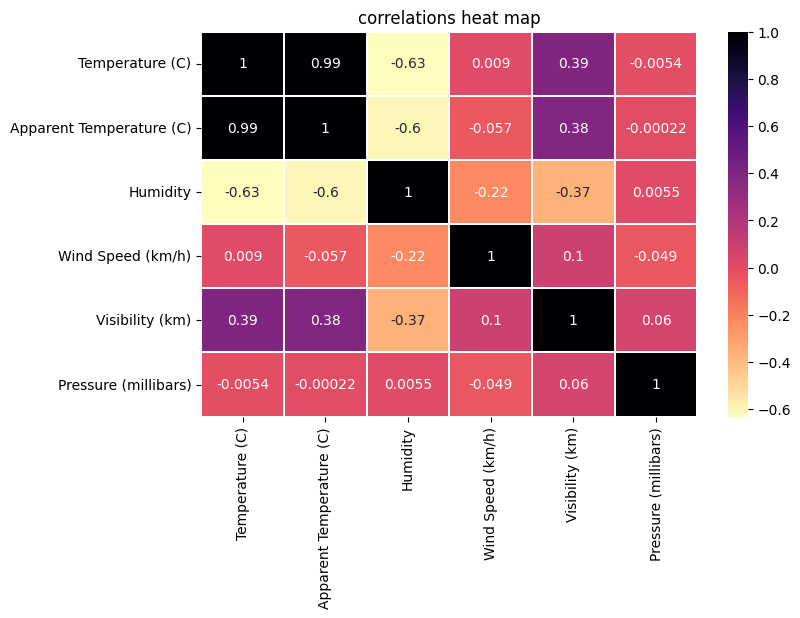

In [ ]:
#checking for correlations between the features
corr=dataset.corr()
corr
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(corr,annot=True,cmap='magma_r',linewidths=0.2)
plt.title("correlations heat map")

In [14]:
#From the above heatmap it is visible that the there is multi-collinearity between Apparent Temperature and Temperature
#Therefor dropping the apparent column

dataset.drop('Apparent Temperature (C)', axis=1, inplace=True)

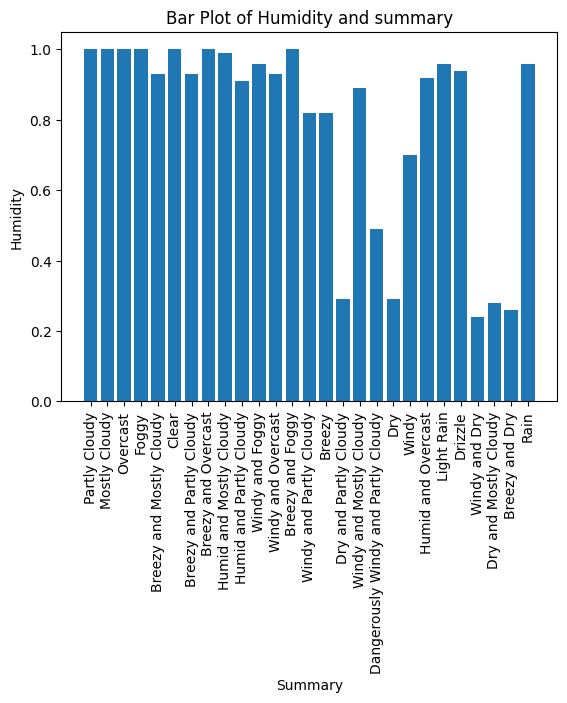

In [ ]:
y = dataset['Humidity']
x = dataset['Summary']

# Create a bar plot
plt.bar(x, y)
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Summary')
plt.ylabel('Humidity')
plt.title('Bar Plot of Humidity and summary')

# Display the plot
plt.show()

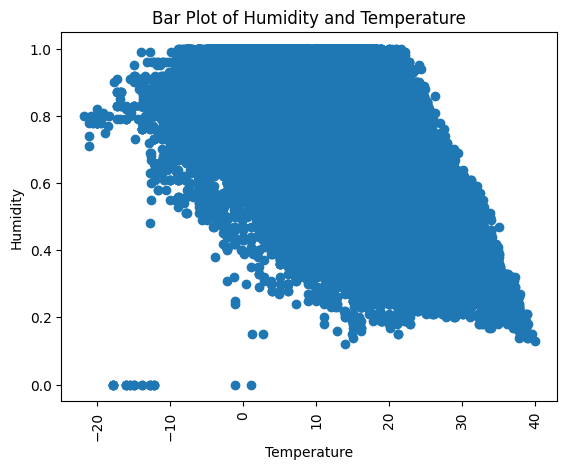

In [ ]:
y = dataset['Humidity']
x = dataset['Temperature (C)']
plt.scatter(x, y)
plt.xticks(rotation=90)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Bar Plot of Humidity and Temperature')
plt.show()

array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >]],
      dtype=object)

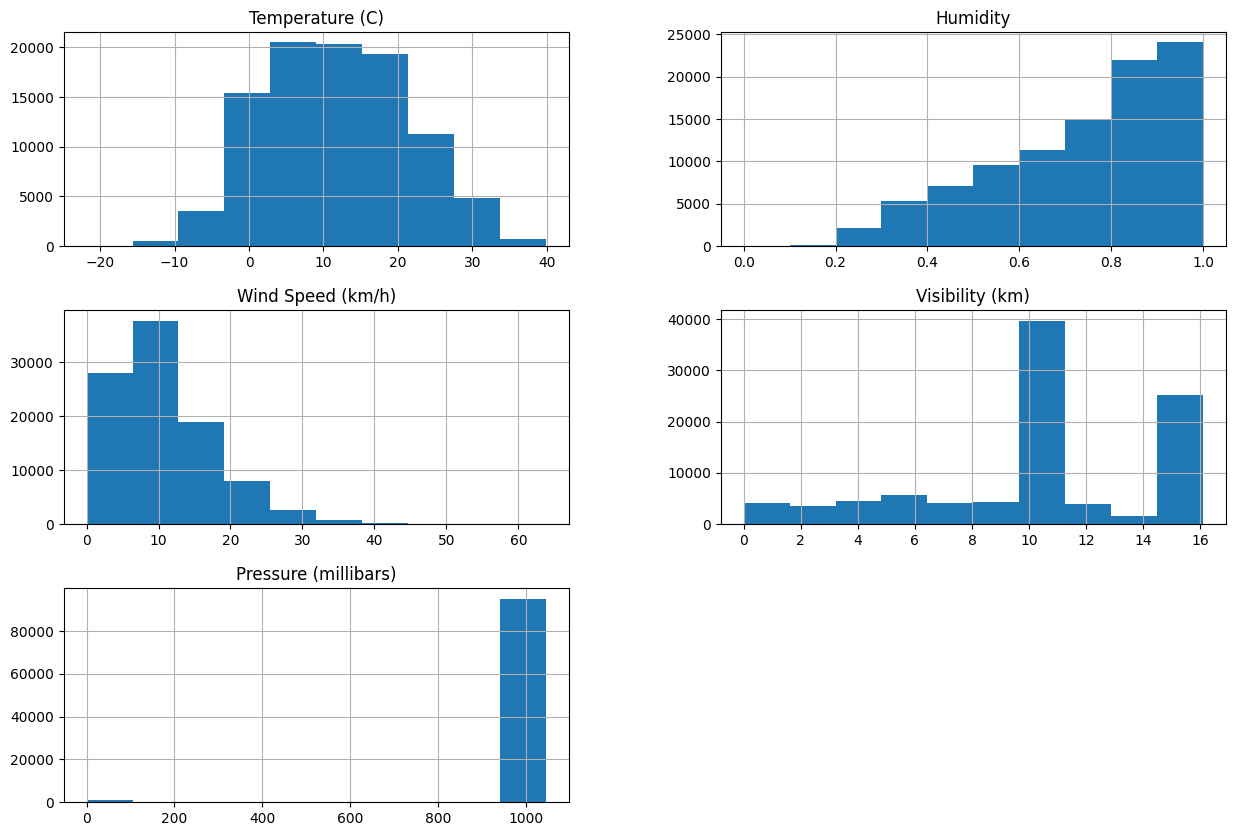

In [ ]:
dataset.hist(figsize=(15, 10))

In [16]:
dataset.head(10)

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,Partly Cloudy,9.472222,0.89,14.1197,15.8263,1015.13
1,Partly Cloudy,9.355556,0.86,14.2646,15.8263,1015.63
2,Mostly Cloudy,9.377778,0.89,3.9284,14.9569,1015.94
3,Partly Cloudy,8.288889,0.83,14.1036,15.8263,1016.41
4,Mostly Cloudy,8.755556,0.83,11.0446,15.8263,1016.51
5,Partly Cloudy,9.222222,0.85,13.9587,14.9569,1016.66
6,Partly Cloudy,7.733333,0.95,12.3648,9.9820,1016.72
7,Partly Cloudy,8.772222,0.89,14.1519,9.9820,1016.84
8,Partly Cloudy,10.822222,0.82,11.3183,9.9820,1017.37
9,Partly Cloudy,13.772222,0.72,12.5258,9.9820,1017.22


In [15]:
#checking for empty values in dataset
empty_zero_values = (dataset == 0).sum()
empty_zero_values

Summary                    0
Temperature (C)          325
Humidity                  22
Wind Speed (km/h)       1297
Visibility (km)          450
Pressure (millibars)    1288
dtype: int64

In [17]:
#Filling the empty values (i.e 0.0) with mean values

dataset['Pressure (millibars)'] = dataset['Pressure (millibars)'].replace(0.0, dataset['Pressure (millibars)'].mean())
dataset['Humidity'] = dataset['Humidity'].replace(0.0, dataset['Humidity'].mean())
dataset['Wind Speed (km/h)'] = dataset['Wind Speed (km/h)'].replace(0.00, dataset['Wind Speed (km/h)'].mean())
dataset['Visibility (km)'] = dataset['Visibility (km)'].replace(0.00, dataset['Visibility (km)'].mean())

In [18]:
#checking for empty values in dataset
empty_zero_values = (dataset == 0).sum()
empty_zero_values

Summary                   0
Temperature (C)         325
Humidity                  0
Wind Speed (km/h)         0
Visibility (km)           0
Pressure (millibars)      0
dtype: int64

In [ ]:
dataset.tail(10)

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
96443,Partly Cloudy,30.894444,0.28,14.7798,15.5526,1014.66
96444,Partly Cloudy,31.083333,0.28,15.5043,16.1000,1014.17
96445,Partly Cloudy,31.083333,0.28,13.8943,16.1000,1013.97
96446,Partly Cloudy,30.766667,0.28,14.2163,15.5526,1013.83
96447,Partly Cloudy,28.838889,0.32,12.2038,16.1000,1014.07
96448,Partly Cloudy,26.016667,0.43,10.9963,16.1000,1014.36
96449,Partly Cloudy,24.583333,0.48,10.0947,15.5526,1015.16
96450,Partly Cloudy,22.038889,0.56,8.9838,16.1000,1015.66
96451,Partly Cloudy,21.522222,0.60,10.5294,16.1000,1015.95
96452,Partly Cloudy,20.438889,0.61,5.8765,15.5204,1016.16


In [21]:
# merging the output classes to improve the accuracy
target_column = dataset['Summary']


# Create a mapping of similar classes to the merged class
class_mapping = {
    'Partly Cloudy': 'Cloudy',
    'Mostly Cloudy': 'Cloudy',
    'Humid and Mostly Cloudy': 'Cloudy',
    'Humid and Partly Cloudy': 'Cloudy',
    'Overcast': 'Cloudy',
    'Humid and Overcast': 'Cloudy',
    'Breezy and Mostly Cloudy': 'Windy',
    'Breezy and Partly Cloudy': 'Windy',
    'Breezy and overcast': 'Windy',
    'Windy and Foggy': 'Foggy',
    'Windy and Overcast': 'Windy',
    'Breezy and Overcast': 'Windy',
    'Breezy and Foggy': 'Foggy',
    'Windy and Partly Cloudy': 'Windy',
    'Breezy': 'Windy',
    'Windy and Mostly Cloudy': 'Windy',
    'Dangerously Windy and Partly Cloudy': 'Windy',
    'Rain': 'Cloudy',
    'Light Rain': 'Cloudy',
    'Drizzle': 'Cloudy',
    'Dry': 'Clear',
    'Windy and Dry': 'Clear',
    'Dry and Mostly Cloudy': 'Clear',
    'Breezy and Dry': 'Clear',
    'Dry and Partly Cloudy': 'Clear',
}

dataset['Summary'] = dataset['Summary'].replace(class_mapping)


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#data['Precip Type']=le.fit_transform(data['Precip Type'])
dataset['Summary']=le.fit_transform(dataset['Summary'])

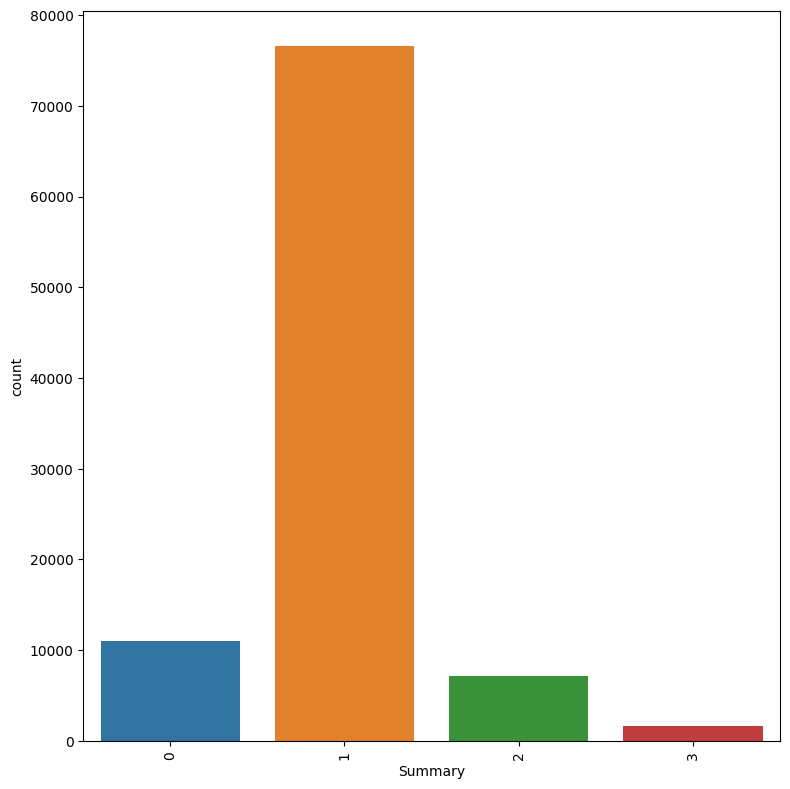

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(x='Summary', data=dataset)
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.tight_layout()  # Adjust the layout to prevent overlapping labels
plt.show()

In [24]:
data = dataset.drop_duplicates()
data

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,1,9.472222,0.89,14.1197,15.8263,1015.13
1,1,9.355556,0.86,14.2646,15.8263,1015.63
2,1,9.377778,0.89,3.9284,14.9569,1015.94
3,1,8.288889,0.83,14.1036,15.8263,1016.41
4,1,8.755556,0.83,11.0446,15.8263,1016.51
...,...,...,...,...,...,...
96448,1,26.016667,0.43,10.9963,16.1000,1014.36
96449,1,24.583333,0.48,10.0947,15.5526,1015.16
96450,1,22.038889,0.56,8.9838,16.1000,1015.66
96451,1,21.522222,0.60,10.5294,16.1000,1015.95


In [25]:
X = data.drop('Summary', axis=1)
y = data['Summary']

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Perform upsampling
X_upsampled_2, y_upsampled_2 = smote.fit_resample(X, y)

print("Class distribution before upsampling:")
print(y.value_counts())

print("Class distribution after upsampling:")
print(y_upsampled_2.value_counts())



Class distribution before upsampling:
1    76556
0    11008
2     7159
3     1637
Name: Summary, dtype: int64
Class distribution after upsampling:
1    76556
2    76556
3    76556
0    76556
Name: Summary, dtype: int64


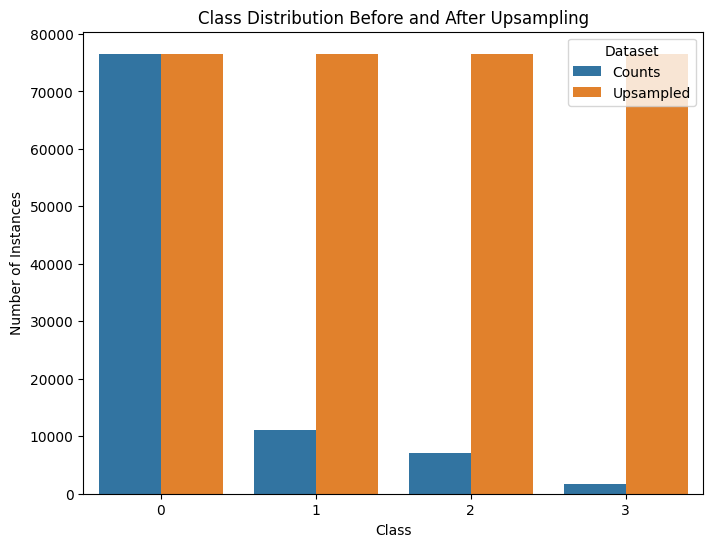

In [26]:
# Calculate class distribution before upsampling
class_counts_before = y.value_counts()

# Calculate class distribution after upsampling
class_counts_after = y_upsampled_2.value_counts()

# Generate x-axis labels for the plot
class_labels = class_counts_before.index

# Create a DataFrame for plotting
dataa = pd.DataFrame({'Class': class_labels, 'Counts': class_counts_before, 'Upsampled': class_counts_after})

# Melt the DataFrame to have 'Counts' and 'Upsampled' as separate columns
melted_data = dataa.melt(id_vars='Class', var_name='Dataset', value_name='Instances')

# Plot the class distribution using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='Instances', hue='Dataset', data=melted_data)

# Set plot labels and title
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution Before and After Upsampling')

# Show the plot
plt.show()


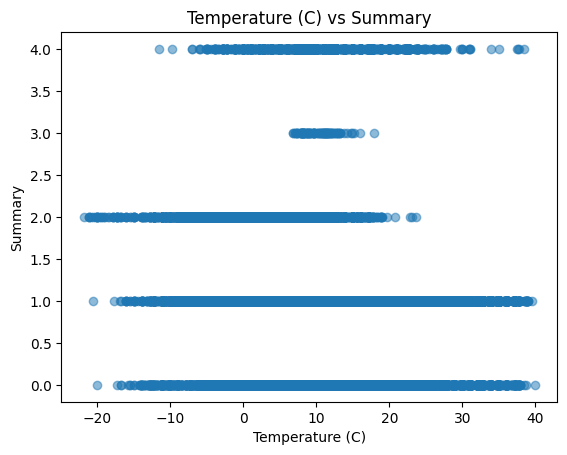

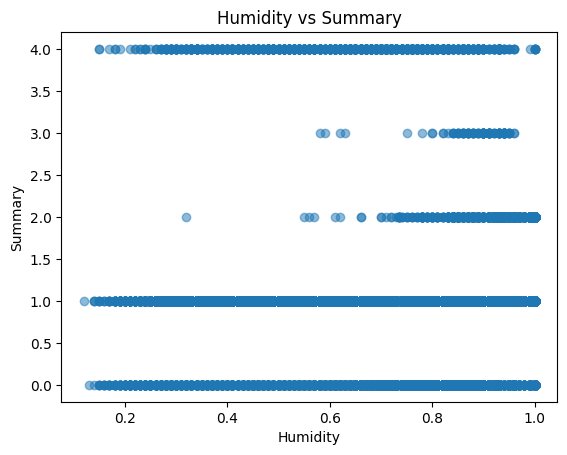

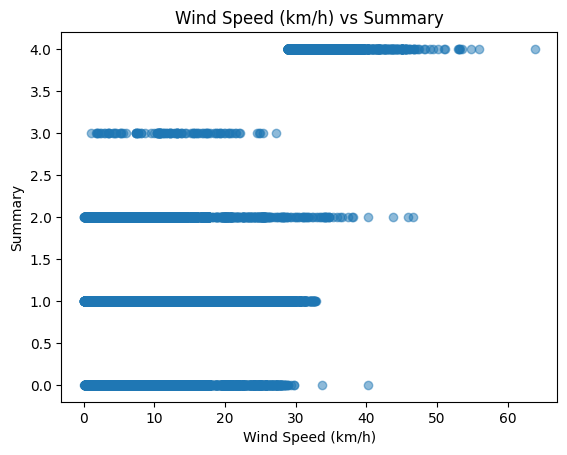

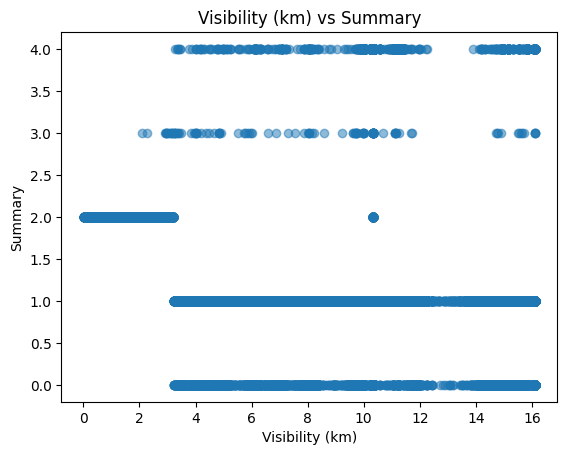

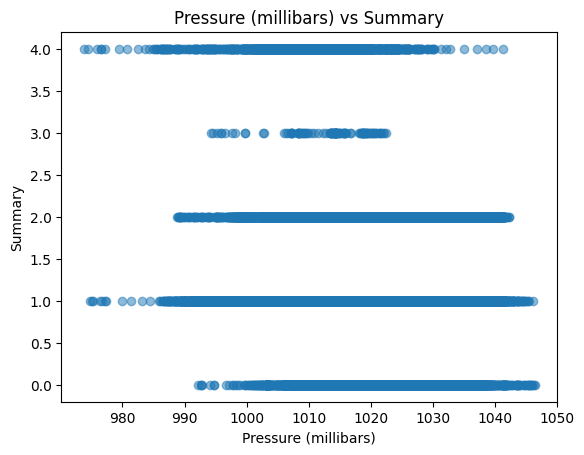

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
feature_columns = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)','Pressure (millibars)']
output_class_column = 'Summary'
# Plot each feature against the output class
for feature in feature_columns:
    plt.figure()
    plt.scatter(data[feature], data[output_class_column], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(output_class_column)
    plt.title(f'{feature} vs {output_class_column}')
    plt.show()


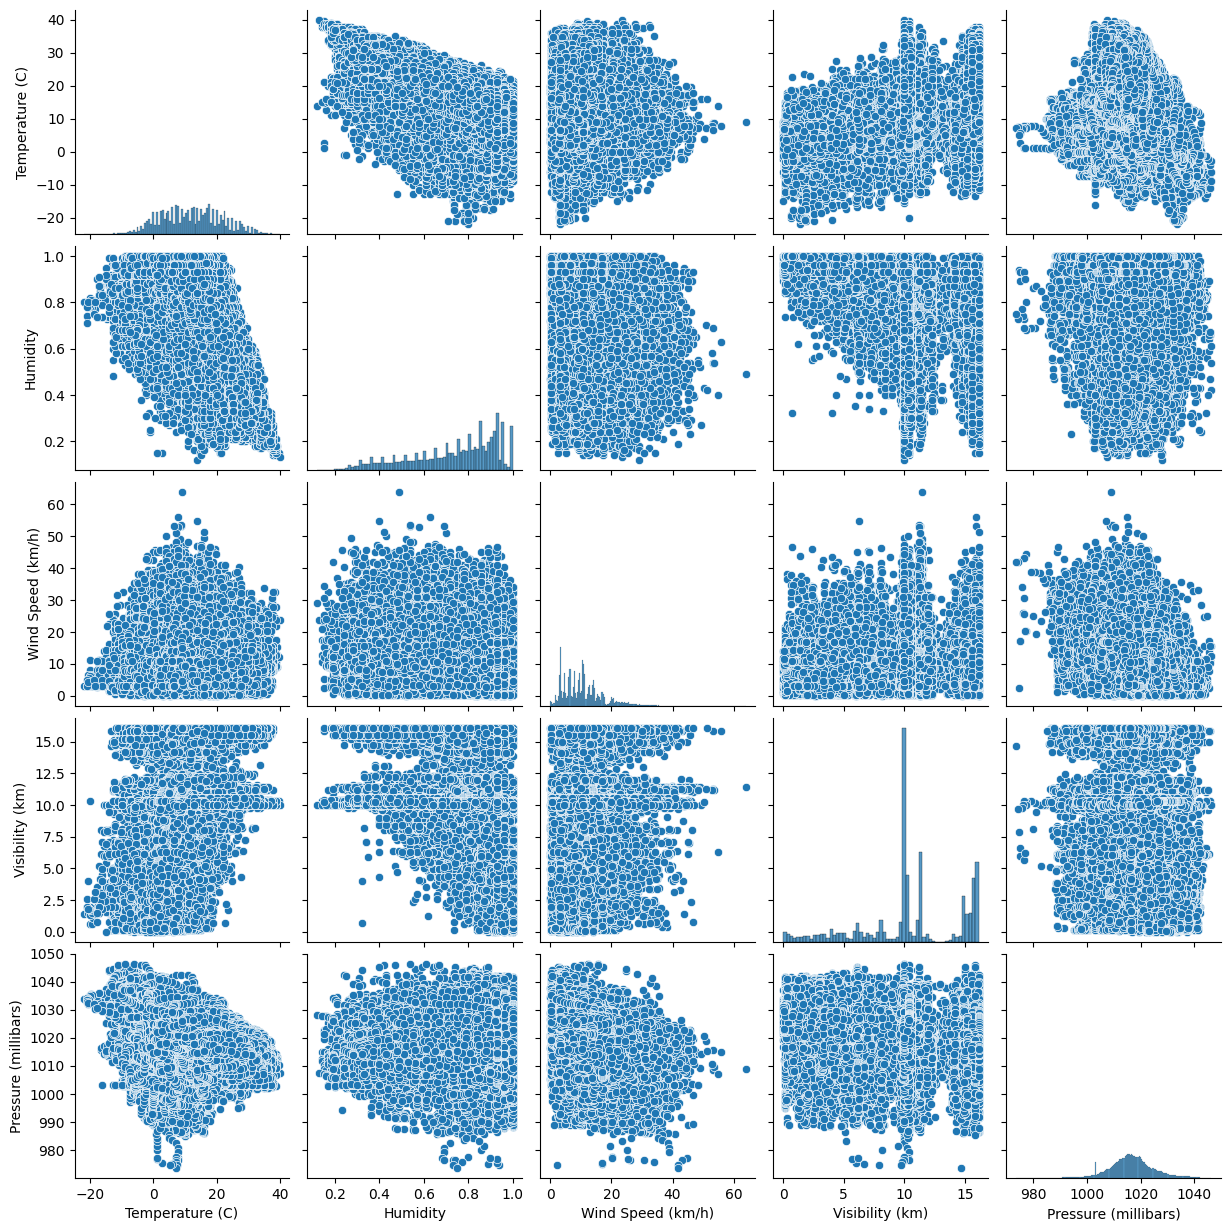

In [ ]:
import seaborn as sns
import pandas as pd

  # Replace 'your_dataset.csv' with the path to your dataset file

# Specify the columns to include in the feature space diagram
feature_columns = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)','Pressure (millibars)']  # Replace with the actual feature column names

# Create the feature space diagram
sns.pairplot(data[feature_columns])
plt.show()


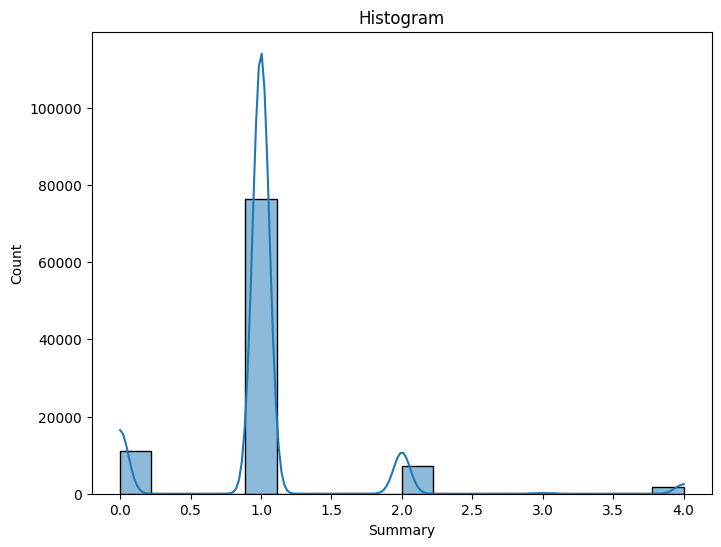

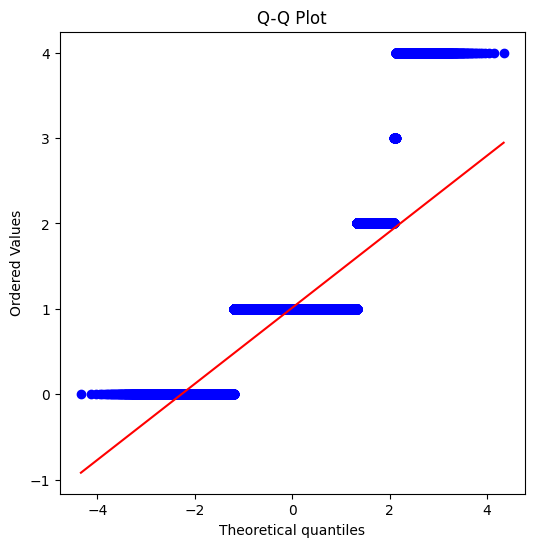

Shapiro-Wilk Test:
Test statistic: 0.5741508603096008
p-value: 0.0
The dataset is not normally distributed.

Kolmogorov-Smirnov Test:
Test statistic: 0.7271064729261602
p-value: 0.0
The dataset is not normally distributed.

Anderson-Darling Test:
Test statistic: 18107.20008701115
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
The dataset is not normally distributed.

Normality Test:
Test statistic: 45738.022168492156
p-value: 0.0
The dataset is not normally distributed.


C:\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
target = data['Summary']

# Visual inspection: Histogram
plt.figure(figsize=(8, 6))
sns.histplot(target, kde=True)
plt.title('Histogram')
plt.show()

# Visual inspection: Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(target, plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk test
statistic, p_value = stats.shapiro(target)
alpha = 0.05  # Significance level

print("Shapiro-Wilk Test:")
print("Test statistic:", statistic)
print("p-value:", p_value)

if p_value > alpha:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

# Kolmogorov-Smirnov test
ks_statistic, ks_p_value = stats.kstest(target, 'norm')

print("\nKolmogorov-Smirnov Test:")
print("Test statistic:", ks_statistic)
print("p-value:", ks_p_value)

if ks_p_value > alpha:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

# Anderson-Darling test
ad_statistic, ad_critical_values, ad_significance_levels = stats.anderson(target, dist='norm')

print("\nAnderson-Darling Test:")
print("Test statistic:", ad_statistic)
print("Critical values:", ad_critical_values)
print("Significance levels:", ad_significance_levels)

if ad_statistic < ad_critical_values[2]:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

# Normality test using normaltest
normaltest_statistic, normaltest_p_value = stats.normaltest(target)

print("\nNormality Test:")
print("Test statistic:", normaltest_statistic)
print("p-value:", normaltest_p_value)

if normaltest_p_value > alpha:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

In [ ]:
data.describe()


,Summary,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
count,96360.000000,96360.000000,96360.000000,96360.000000,96360.000000,96360.000000
mean,1.013346,11.937464,0.734983,10.959597,10.398820,1016.631308
std,0.588135,9.546900,0.195143,6.796417,4.129753,7.882903
min,0.000000,-21.822222,0.120000,0.032200,0.016100,973.780000
25%,1.000000,4.715278,0.600000,6.118000,8.468600,1011.900000
50%,1.000000,12.011111,0.780000,10.320100,10.046400,1016.440000
75%,1.000000,18.838889,0.890000,14.135800,14.812000,1021.090000
max,4.000000,39.905556,1.000000,63.852600,16.100000,1046.380000


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Specify the columns to be normalized
columns_to_normalize = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)','Pressure (millibars)']

# Normalize the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data

<ipython-input-27-712c687d170c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])


,Summary,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,1,0.506975,0.875000,0.220737,0.982983,0.569559
1,1,0.505085,0.840909,0.223007,0.982983,0.576446
2,1,0.505445,0.875000,0.061049,0.928929,0.580716
3,1,0.487805,0.806818,0.220484,0.982983,0.587190
4,1,0.495365,0.806818,0.172553,0.982983,0.588567
...,...,...,...,...,...,...
96448,1,0.774998,0.352273,0.171796,1.000000,0.558953
96449,1,0.751778,0.409091,0.157669,0.965966,0.569972
96450,1,0.710557,0.500000,0.140262,1.000000,0.576860
96451,1,0.702187,0.545455,0.164480,1.000000,0.580854


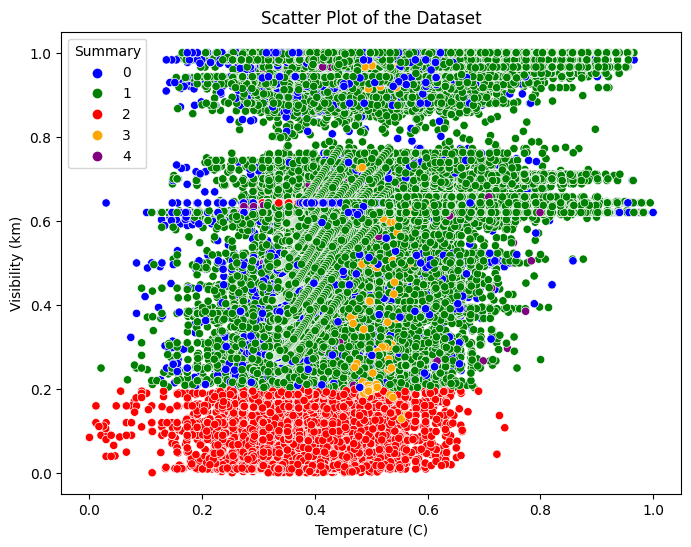

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with features and the target class column 'target'
# Replace 'feature1', 'feature2' with your actual feature column names
# Replace 'target' with your actual target class column name
custom_palette = ['blue', 'green', 'red', 'orange', 'purple']
# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature (C)', y='Visibility (km)', hue='Summary', data=data, palette=custom_palette)
plt.title('Scatter Plot of the Dataset')
plt.xlabel('Temperature (C)')
plt.ylabel('Visibility (km)')
plt.show()


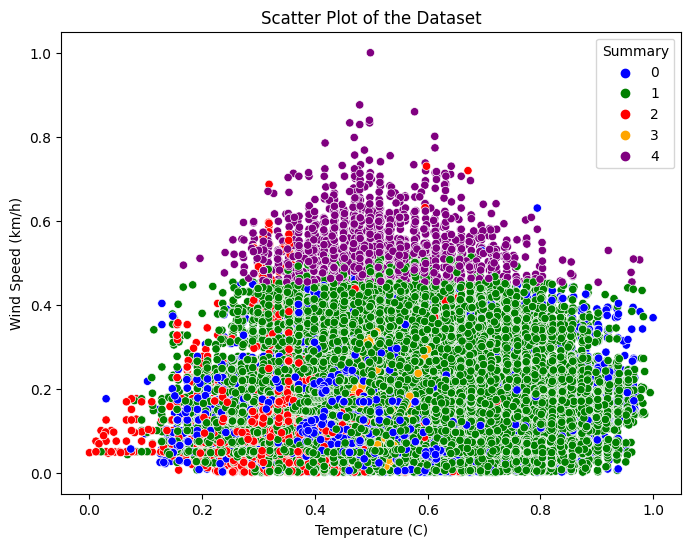

In [ ]:
custom_palette = ['blue', 'green', 'red', 'orange', 'purple']
# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature (C)', y='Wind Speed (km/h)', hue='Summary', data=data, palette=custom_palette)
plt.title('Scatter Plot of the Dataset')
plt.xlabel('Temperature (C)')
plt.ylabel('Wind Speed (km/h)')
plt.show()

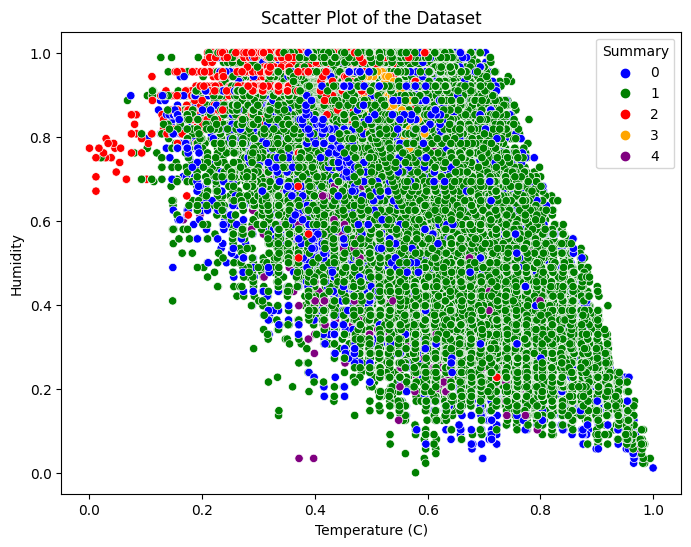

In [ ]:
custom_palette = ['blue', 'green', 'red', 'orange', 'purple']
# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature (C)', y='Humidity', hue='Summary', data=data, palette=custom_palette)
plt.title('Scatter Plot of the Dataset')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.show()

In [ ]:
target_column = data['Summary']
# Create a mapping of similar classes to the merged class
class_mapping = {
    'Rainy': 'Cloudy',
}
data['Summary'] = data['Summary'].replace(class_mapping)


***Step 2: IMPLEMENTING ALGORITHMS / SELECTING BEST ALGORITHM***

**NON-PARAMETRIC ALGORITHM**

In [28]:
X = data.drop('Summary', axis=1)
y = data['Summary']

## **Random Forest**

Testing Accuracy: 0.9505020818025961
Training Accuracy: 1.0
[[28086  2624     7     6]
 [ 3327 27018     5    83]
 [    3     7 30711     0]
 [    0     1     0 30612]]
              precision    recall  f1-score   support

     class 0       0.89      0.91      0.90     30723
     class 1       0.91      0.89      0.90     30433
     class 2       1.00      1.00      1.00     30721
     class 3       1.00      1.00      1.00     30613

    accuracy                           0.95    122490
   macro avg       0.95      0.95      0.95    122490
weighted avg       0.95      0.95      0.95    122490



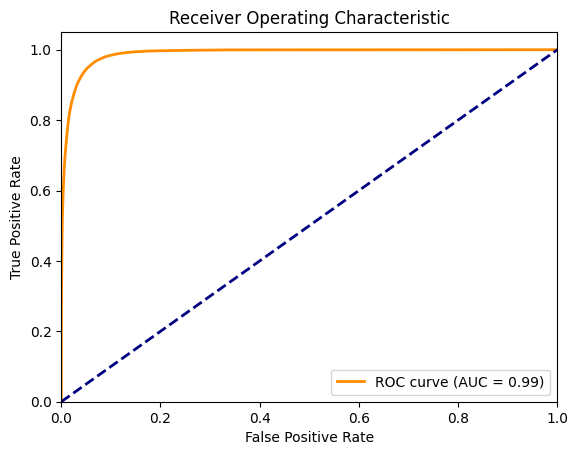

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

X = data.drop(['Summary'], axis=1)
y = data['Summary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled_2, y_upsampled_2, test_size=0.4, random_state=42)
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the Random Forest classifier
model = rf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf.predict(X_test)
# Evaluate the accuracy of the model
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_accuracy)

y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

print(confusion_matrix(y_test, y_pred))
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



Testing Accuracy: 0.9469181157645522
Training Accuracy: 0.9998802616826499
[[28058  2651     8     6]
 [ 3736 26609     6    82]
 [    5     7 30709     0]
 [    0     1     0 30612]]
              precision    recall  f1-score   support

     class 0       0.88      0.91      0.90     30723
     class 1       0.91      0.87      0.89     30433
     class 2       1.00      1.00      1.00     30721
     class 3       1.00      1.00      1.00     30613

    accuracy                           0.95    122490
   macro avg       0.95      0.95      0.95    122490
weighted avg       0.95      0.95      0.95    122490



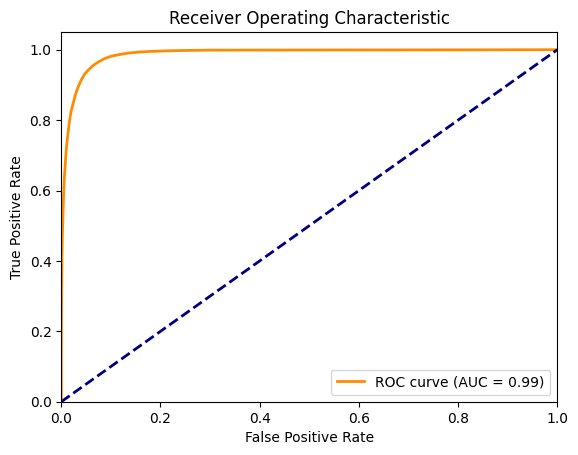

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_upsampled_2, y_upsampled_2, test_size=0.4, random_state=42)
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=30, random_state=0)
# Train the Random Forest classifier
model = rf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf.predict(X_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

print(confusion_matrix(y_test, y_pred))
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=7)
#metrics.plot_roc_curve(model, X_test, y_test)

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Testing Accuracy: 0.9494815903339048
Training Accuracy: 0.9999945573492114
[[28053  2655     9     6]
 [ 3417 26927     5    84]
 [    3     7 30711     0]
 [    0     2     0 30611]]
              precision    recall  f1-score   support

     class 0       0.89      0.91      0.90     30723
     class 1       0.91      0.88      0.90     30433
     class 2       1.00      1.00      1.00     30721
     class 3       1.00      1.00      1.00     30613

    accuracy                           0.95    122490
   macro avg       0.95      0.95      0.95    122490
weighted avg       0.95      0.95      0.95    122490



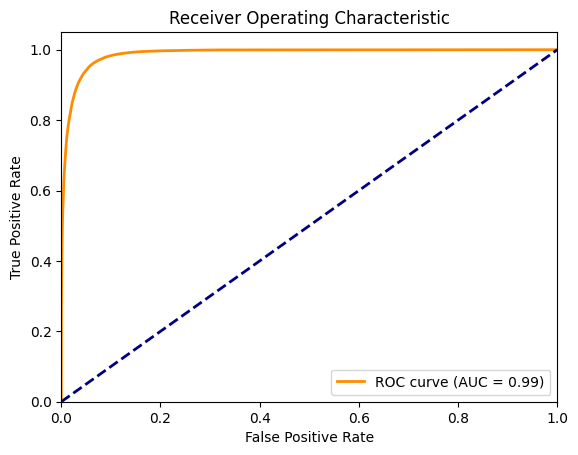

In [32]:
rf = RandomForestClassifier(n_estimators=60, random_state=0)
# Train the Random Forest classifier
model=rf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf.predict(X_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

print(confusion_matrix(y_test, y_pred))
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=7)
#metrics.plot_roc_curve(model, X_test, y_test)

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **Naive Bayes**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X_upsampled_2,y_upsampled_2, test_size=0.20, random_state=20)

In [34]:
classifier = GaussianNB(priors=[0.25,0.25,0.25,0.25])

scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)

array([[-1.08405042,  0.82070821, -0.99548374,  0.2110178 ,  1.68802791],
       [ 0.29575543, -0.09910252,  1.44873752,  0.03369576, -2.15883623],
       [-1.35383078,  0.86099836, -0.47844824, -1.7040394 ,  1.79127481],
       ...,
       [-1.2695675 ,  1.18342371, -0.22368922, -1.2797438 ,  1.17088125],
       [-0.32240343, -0.06149543,  1.35712719,  0.2110178 ,  0.59258312],
       [-1.09176669,  1.18236844,  0.01743785, -0.53365203,  0.22546589]])

In [35]:
scaler.transform(X_test)

array([[-0.56724734,  0.53375548,  1.647476  ,  0.46386176, -0.20102799],
       [ 1.6779454 , -1.85877091,  0.82368173,  1.36377647, -0.36563304],
       [-0.55756374,  1.23403419, -0.39410303, -1.07551816,  2.04444173],
       ...,
       [-2.48297637,  0.79718422, -1.00538105, -1.72803603,  0.938747  ],
       [-1.08998601,  0.82070821, -1.118946  , -0.56850891,  1.08908399],
       [-0.14363872, -0.38491658,  2.08262582,  0.25856661, -3.90801706]])

In [36]:
model =classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
print('The accuracy is ' + str(metrics.accuracy_score(y_test, y_pred)*100) + '%')
print(confusion_matrix(y_test, y_pred))

Training Accuracy: 0.7797852060788883
The accuracy is 77.85288594987347%
[[ 9953  4387   833   186]
 [ 6177  7657  1007   550]
 [  301    59 14941    64]
 [    0     0     0 15130]]


              precision    recall  f1-score   support

     class 0       0.61      0.65      0.63     15359
     class 1       0.63      0.50      0.56     15391
     class 2       0.89      0.97      0.93     15365
     class 3       0.95      1.00      0.97     15130

    accuracy                           0.78     61245
   macro avg       0.77      0.78      0.77     61245
weighted avg       0.77      0.78      0.77     61245



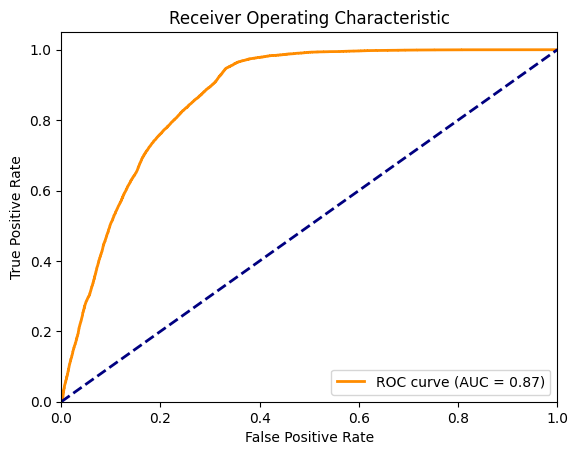

In [38]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=7)
#metrics.plot_roc_curve(model, X_test, y_test)

y_pred_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **PARAMETRIC ALGORITHM**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold



X_train, X_test, y_train, y_test = train_test_split(X_upsampled_2,y_upsampled_2, test_size=0.20, random_state=20)

logistic_regression = LogisticRegression(random_state=0,max_iter=10000)

# Train the model on the training data
model=logistic_regression.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print('The accuracy is ' + str(metrics.accuracy_score(y_test, y_pred)*100) + '%')




y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

print(confusion_matrix(y_test, y_pred))
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



The accuracy is 78.64478732957792%
